# Tarea N°01

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__:

* __Rol__:

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scriptsm, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.-  Imagenception

Desde [Wikipedia](https://es.wikipedia.org/wiki/RGB), __RGB__ (sigla en inglés de red, green, blue) es un modelo de color basado en la síntesis aditiva, con el que es posible representar un color mediante la mezcla por adición de los tres colores de luz primarios. El modelo de color RGB no define por sí mismo lo que significa exactamente rojo, verde o azul, por lo que los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos que usen este modelo de color. Aunque utilicen un mismo modelo de color, sus espacios de color pueden variar considerablemente.

Para indicar con qué proporción es mezclado cada color, se asigna un valor a cada uno de los colores primarios, de manera que el valor "0" significa que no interviene en la mezcla y, a medida que ese valor aumenta, se entiende que aporta más intensidad a la mezcla. Aunque el intervalo de valores podría ser cualquiera (valores reales entre 0 y 1, valores enteros entre 0 y 37, etc.), es frecuente que cada color primario se codifique con un byte (8 bits).

Así, de manera usual, la intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 y cada color es definido por un conjunto de valores escritos entre paréntesis (correspondientes a valores "R", "G" y "B") y separados por comas.

El conjunto de todos los colores también se puede representar en forma de cubo. Cada color es un punto de la superficie o del interior de éste. La escala de grises estaría situada en la diagonal que une al color blanco con el negro.

![rgb](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Avl3119color4a.svg/800px-Avl3119color4a.svg.png)

Para efectos prácticos del curso, es posible representar cada pixel de una imagen con un array de 3 dimensiones, cada valor representa a una de las capas RGB. Por lo tanto, una imagen de $n \times m$ pixeles se representa como un arreglo de dimension $(n, m , 3)$ En `Python` una de las librerías de procesamiento de imágenes más utilizada es `Pillow`.

Abrir una imagen es tan fácil como:

In [1]:
# librerias

import os
import numpy as np
from PIL import Image

In [ ]:
gatito = Image.open(os.path.join("images", "gatito.png"))

Notar que la variable anterior es de una clase específica de la librería.

In [ ]:
type(gatito)

Para ver la imagen en Jupyter puedes utilizar la misma técnica que con los `pd.DataFrames`, es decir:

In [ ]:
gatito

Para tener su representación en un array podemos utilizar el constructor `np.array` con argumento la imagen.

In [ ]:
gatito_np = np.array(gatito)
print(f"Dimension de la imagen gatito: {gatito_np.shape}.\n")
print(f"Al convertir a np.ndarry el tipo de elementos es {gatito_np.dtype}.\n")
print(gatito_np)

### 1.- Encontrando la imagen oculta

La imagen anterior tiene una imagen oculta, el ejercicio corresponde en descifrarlo. Las instrucciones son las siguientes:

1.1 Crear una lista vacía declarada como `secret_list`.

In [ ]:
secret_list = []

1.2 Iterar por cada uno de los canales RGB (`gatito_np.shape[2]`) y en cada iteración:
 * Crear un arreglo temporal llamado `secret_aux` de dos dimensiones, de la misma dimension de pixeles de la imagen `gatito` y que tenga valores enteros, `0` si el valor de la capa de `gatito_np` es par y `1` si es impar. 
  - No iterar por filas y columnas.
  - Utilizar la operación módulo `%`. 
  - En la i-ésima iteración de los canales la capa de `gatito_np` es `gatito_np[:, :, i]`.
        
        
 * Escalar `secret_aux` a valores 0 y 255.
    
 * Cambiar el `dtype` de `secret_aux` a `np.uint8` (utilize el méteodo `astype()`).
            
 * Agregue `secret_aux` a `secret_list`.
    
Al final de la iteración `secret_list` debe tener solo tres arreglos.

**Observación:** recuerde que puede aplicar operaciones directo a un arreglo de numpy.

In [ ]:
for channel in range(gatito_np.shape[2]):
    secret_aux = np.zeros((2160,1280),dtype=int)
    secret_aux = gatito_np[:,:,channel]%2
    secret_aux =secret_aux*255 
    secret_aux.astype(np.uint8)
    secret_list.append(secret_aux)

In [ ]:
print(f"secret_list tiene {len(secret_list)} elementos")

1.3 Crear la variable `secret_np` concatenando horizontalmente los elementos de `secret_list`.

In [ ]:
secret_np=np.array([])
secret_np =np.concatenate((secret_list[0],secret_list[1],secret_list[2]),axis=1)## FIX ME ##
secret_np

1.4 Crear el objeto `secret_img` utilizando el arreglo `secret_np`, asegurar que los valores estén entre 0 y 255, y que el dtype sea `np.uint8`, con el método `Image.fromarray` con argumento `mode="L"`

In [ ]:
np.unique(secret_np)

In [ ]:
secret_np.dtype

In [ ]:
secret_img = Image.fromarray(secret_np)

Ahora puedes ver el resultado!

In [ ]:
secret_img

### 2.- Escondiendo una nueva imagen

Es tu turno, ahora tu esconderás una imagen. Las instrucciones son las siguientes:

2.1 Selecciona una imagen de 2160 x 3840 pixeles (a.k.a resolución 4k), lo importante es que sea solo en blanco y negro, en la carpeta `images` se disponibiliza como ejemplo la imagen `black_and_white_example.jpg` y crea una variable llamada `my_img` leyendo la imagen seleccionada con `Image.open()`.

In [14]:
my_img = Image.open(os.path.join("images","black_and_white_example.jpg"))

2.2 Crea un arreglo llamado `my_img_np` utilizando `my_img` y el método `np.array()`.
    * Es importante que `my_img_np.shape` sea `(2160, 3840)`, es decir, que solo sea de dos dimensiones. Esto porque es una imagen en blanco y negro, no necesitando el modelo RGB.

(2160, 3840)


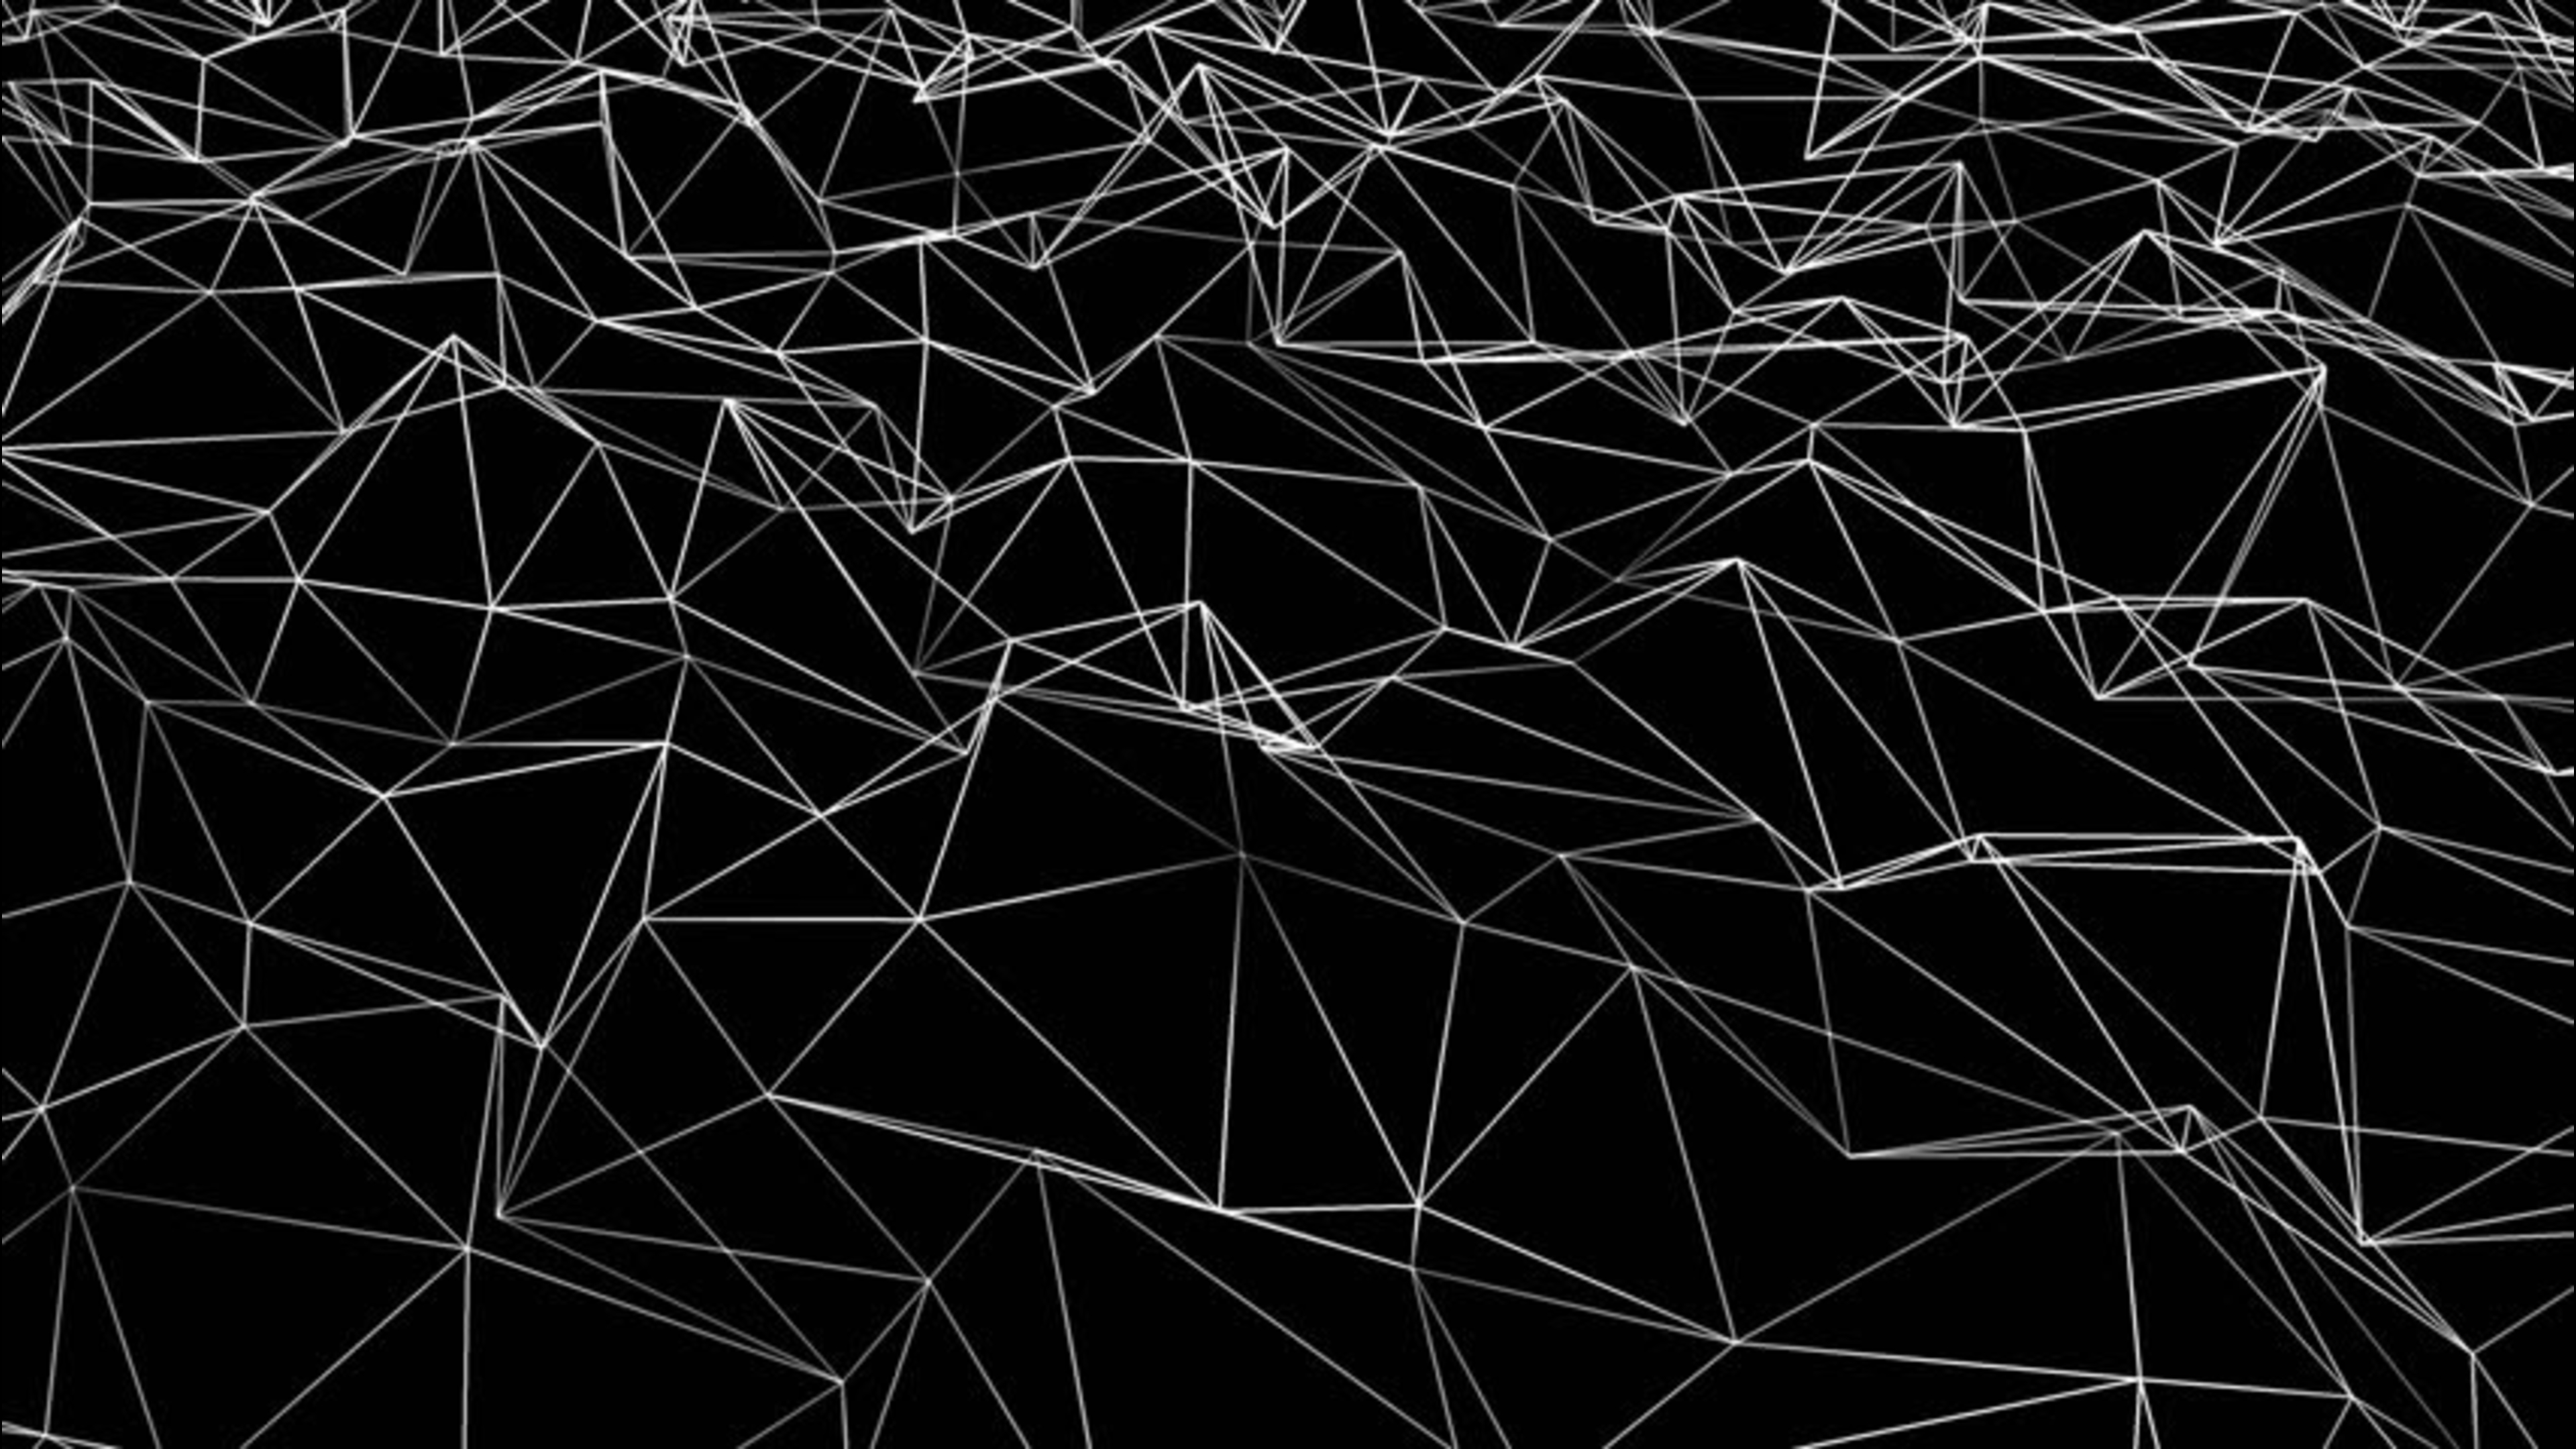

In [40]:
my_img_np = np.array(my_img)## FIX ME ##
print(my_img_np.shape)
Image.fromarray(my_img_np)

2.3 Crear la variable `my_img_np_aux` utilizando un _umbral_ con tal de que:
    - 1: Si el valor del pixel es mayor  al _umbral_.
    - 0: Si el valor del pixel es menor o igual al _umbral_.
    - El `dtype` debe ser `np.uint8`.
    - Para `black_and_white_example.jpg` un umbral adecuado es `20`.

In [44]:
umbral = 20
my_img_np_aux = np.zeros((2160,3840),dtype=np.uint8)
for fila in my_img_np:
    
    
"""my_img_np_aux[my_img_np[:,:]>20]=1
my_img_np_aux[my_img_np[:,:]<=20]=0
np.unique(my_img_np_aux)
"""

0


'my_img_np_aux[my_img_np[:,:]>20]=1\nmy_img_np_aux[my_img_np[:,:]<=20]=0\nnp.unique(my_img_np_aux)\n'

Puedes probar que tan bien quedó la imagen con la siguiente linea. Si crees que no se ve bien, puedes cambiar el _umbral_.

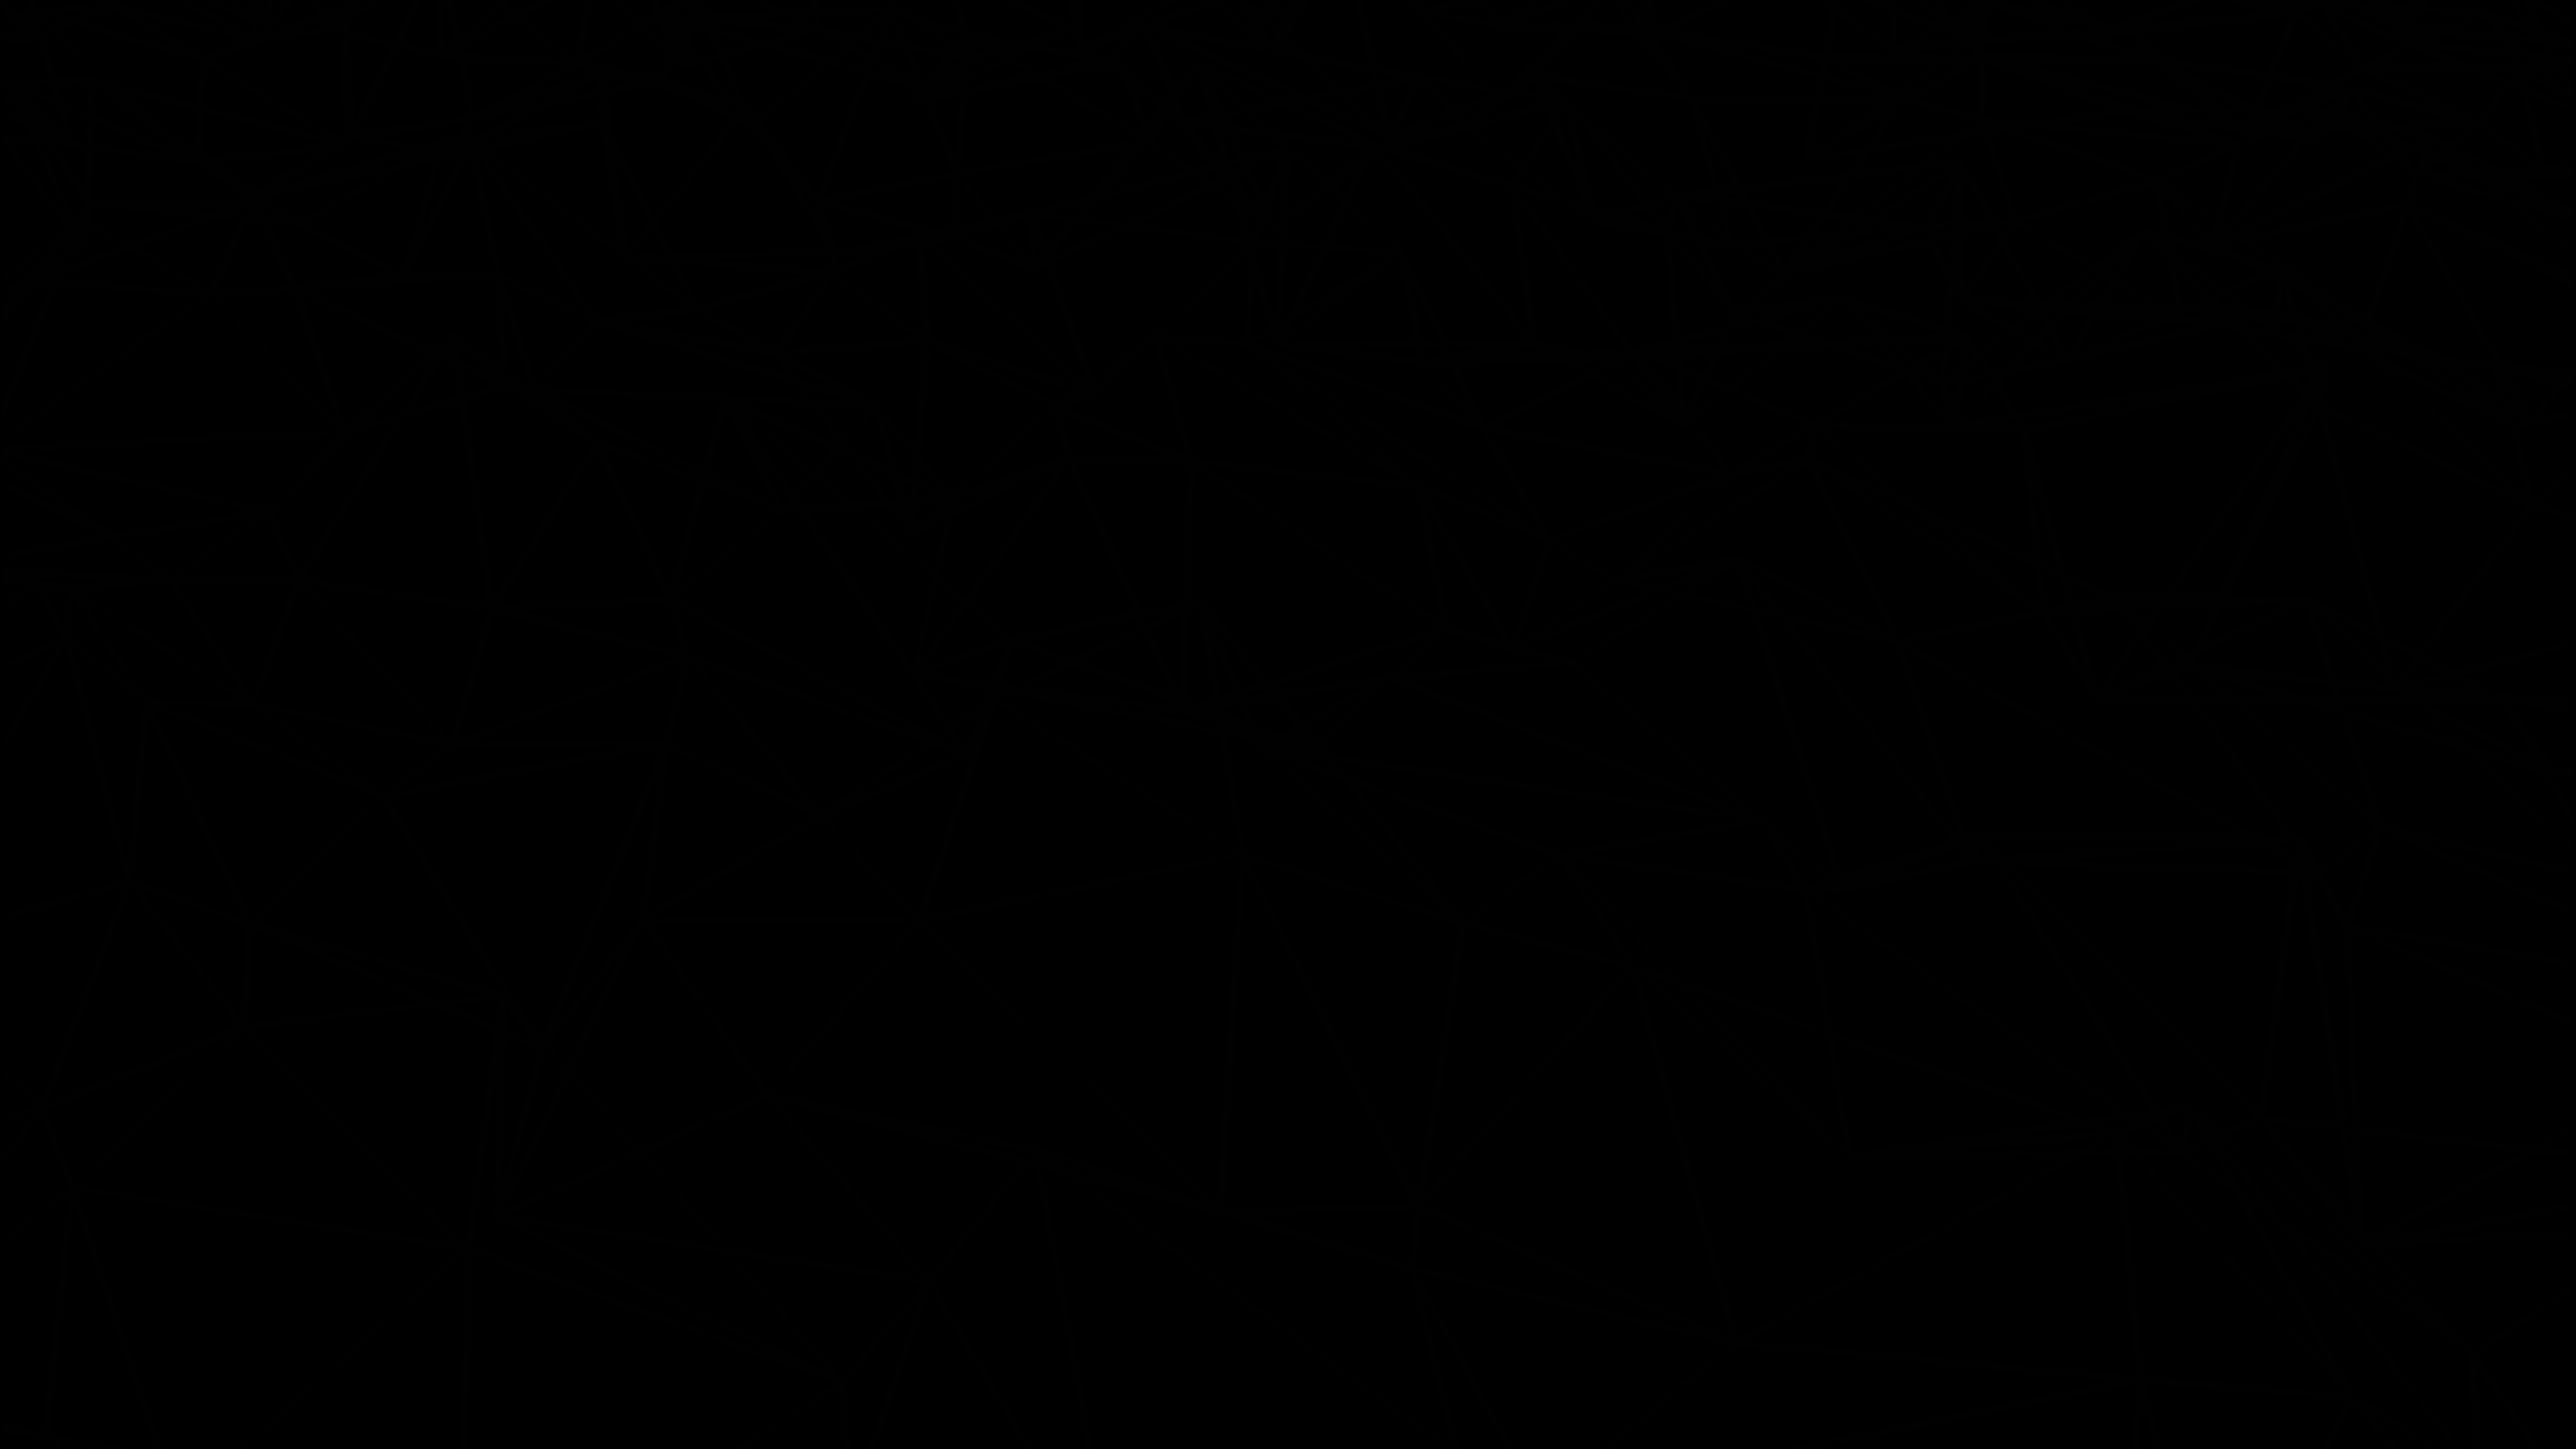

In [36]:
Image.fromarray(my_img_np_aux)

2.4 Dividir la imagen en tres arreglos de tamaño (2160, 1280) y guardarlos en una lista con el nombre `my_img_split`. Hint: Revisa en la documentación de `numpy`.

In [ ]:
my_img_split = ## FIX ME ##

Revisa utilizando la siguiente iteración.

In [ ]:
for img_array in my_img_split:
    print(img_array.shape)

2.5 La imagen donde se esconderá tu imagen selecionada está en la carpeta `images` con el nombre `gatito_original.png`, que sospechosamente es de 2160 x 1280 pixeles. Carga la imagen en la variable `cat` y luego crea arreglo `cat_np` utilizando `cat`. Verifica que `cat_np.shape = (2160, 1280, 3)`.

In [ ]:
cat = Image.open(## FIX ME ##)
cat_np = ## FIX ME ##
print(cat_np.shape)

2.6 Convierte todos los valores de `cat_np` a valores pares. Esto lo puedes hacer sumando 1 a cada valor de arreglo si es impar

In [ ]:
cat_np ## FIX ME ##

2.7 Itera por canal RGB de `cat_np` y en cada capa suma los valores de uno de los arreglos de `my_img_split`.

In [ ]:
for channel in ## FIX ME ##:
    cat_np[## FIX ME ##] += ## FIX ME ##

2.8 Crea una variable llamada `cat_secret_im` con `Image.fromarray` y la variable `cat_np` (que ya ha sido modificada). Luego guarda la imagen en la carpeta `images` con el nombre `my_secret.png`.

In [ ]:
cat_secret_im = Image.fromarray(## FIX ME ##)
cat_secret_im.save(## FIX ME ##)

2.9 Crea una función llamada `imagenception()` que como argumento tenga la ruta de la imagen que quieres descifrar y que descifre la imagen secreta recientemente creada. Hint: Utiliza todos los pasos de la primera parte. 

In [ ]:
def imagenception(filepath):
   ## FIX ME ##
    return secret_img

In [ ]:
my_secret_img = imagenception(os.path.join("images", "my_secret.png"))
my_secret_img

## II.- Analizando la Felicidad

<img src="https://static01.nyt.com/images/2019/09/29/opinion/sunday/29HolsonStill/29HolsonStill-popup.jpg" width="480" height="360" align="center"/>

Este ejercicio es netamente análisis de datos, tratando de abarcar problemas típicos como la lectura de datos, corrección de errores, métricas agrupadas, unión de datos, etc. Utilizaremos un conjunto de datos llamado __World Happiness Report__ disponible en el siguiente [link](https://www.kaggle.com/unsdsn/world-happiness), de donde se puede obtener información al respecto.

#### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


### 2.1 Lectura de datos

In [ ]:
# libraries
import os
import pandas as pd
pd.set_option("display.max_columns", 999)  # Permite mostrar hasta 999 columnas de un DataFrame en Jupyter.

En la carpeta `data/world-happiness` se disponen de tres archivos, uno por cada reporte anual (años 2015, 2016 y 2017). No es de sorprender que envíen un archivo por año (podría ser mensual, semestral, etc.), lo imortante es ser capaces de leer una cantidad __variable__ de archivos al mismo tiempo. Una buena práctica es crear un diccionario de dataframes.

In [ ]:
# Comprehension dictionary
df_dict = {
    year: pd.read_csv(os.path.join("data", "world-happiness", f"{year}.csv"))
    for year in [2015, 2016, 2017]
}

Por ejemplo, se puede acceder al DataFrame asociado al archivo `data/world-happiness/2016.csv` de la siguiente manera:

In [ ]:
df_dict[2016].head()

Una pequeña descripción de las columnas

* `Country` Name of the country.
* `Region` Region the country belongs to.
* `Happiness Rank` Rank of the country based on the Happiness Score.
* `Happiness Score` A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* `Standard Error` The standard error of the happiness score.
* `Economy (GDP per Capita)` The extent to which GDP contributes to the calculation of the Happiness Score.
* `Family` The extent to which Family contributes to the calculation of the Happiness Score
* `Health (Life Expectancy)` The extent to which Life expectancy contributed to the calculation of the Happiness Score
* `Freedom` The extent to which Freedom contributed to the calculation of the Happiness Score.
* `Trust (Government Corruption)` The extent to which Perception of Corruption contributes to Happiness Score.
* `Generosity` The extent to which Generosity contributed to the calculation of the Happiness Score.
* `Dystopia Residual` The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Notar que los conjuntos de datos no poseen las mismas columnas, por lo tanto, solo se trabajarán con las columnas en común y posteriormente agregaremos el año con tal de concatenar los tres conjuntos.

In [ ]:
from functools import reduce
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist() + ["Year"]
print(intersection_columns)

Explica con tus palabras las operaciones que se realizaron para obtener la variable `intersection_columns`.

__Respuesta:__  < RESPONDER AQUÍ >

### 2.2 Concatenación y procesado

Define el DataFrame `happiness` tal que:

* Sea la concatenación de los dataframes de `df_dict`
    - Nota que en la documentación de `pd.concat` puedes entregar como argumento directamente un diccionario.
    - No ordenes los _axis_ (ver documentación).
    - Los nombres de los _levels_ para los multi-index resultante deben ser `["Year", "drop_me"]`.
* Aplica el método `drop_level` con tal de eliminar el nivel del multi-index llamado `drop_me`.
* Resetea los índices.
* Selecciona solo las columnas de la lista `intersection_columns`.
* Los nombres de las columnas deben estar en minísculas, reemplazar espacios por guiones bajos (`_`) y elimina los paréntesis.


In [ ]:
happiness = (
    pd.concat(## FIX ME ##)
    .droplevel(## FIX ME ##)
    .## FIX ME ##
    .## FIX ME ##
    .## FIX ME ##
)
happiness.head()

### 2.3 Análisis

Como siempre, partimos con un análisis descriptivo simple.

In [ ]:
happiness.describe(include="all").fillna("").T

¿Cuántos países no tienen mediciones de felicidad en los tres años del estudio? ¿Cuáles son?

In [ ]:
## FIX ME ##

In [ ]:
## FIX ME ##

__Respuesta:__  < RESPONDER AQUÍ >

Note que la lista de países proveniente de la pregunta anterior tiene errores de consistencia, por ejemplo están los registros de `Hong Kong` y `Hong Kong S.A.R., China` que escencialmente son el mismo. Lo mismo ocurre con `Taiwan` y `Somaliland Region`.

Modifique la columna `country` del dataframe `happiness` con tal de reparar los errores de `Hong Kong`, `Taiwan` y `Somaliland Region`.

In [ ]:
bad_country_names_dict = {"Hong Kong S.A.R., China": "Hong Kong", ## FIX ME ##}
happiness = happiness.assign(## FIX ME ##)

Luego de la modificación, ¿Cuántos países no tienen mediciones en los tres años de estudio?

In [ ]:
## FIX ME ##

__Respuesta:__  < RESPONDER AQUÍ >

Pivotea el dataframe `happines` tal que los índices sean los años, las columnas los países y el valor su `happiness_score`. LLena los valores nulos con un _string_ vacío `""`. Un país no puede tener más de un registro por año, por lo que puedes utilizar directamente el médoto `pd.DataFrame.pivot()`.


In [ ]:
## FIX ME ##

¿Qué información podrías sacar rápidamente de esta tabla pivoteada? ¿Podrías decir que siempre es útil pivotear una tabla?

__Respuesta:__  < RESPONDER AQUÍ >

En promedio, ¿Cuáles son los tres países con el mejor ranking de felicidad?

In [ ]:
## FIX ME ##

__Respuesta:__  < RESPONDER AQUÍ >

En promedio, ¿Cuáles son los tres países con el mayor _score_ de felicidad? ¿Son distintos a los con mejor ranking en promedio?

In [ ]:
## FIX ME ##

__Respuesta:__  < RESPONDER AQUÍ >

Calcula el promedio anual de todas las columnas factores de felicidad, es decir, todas las variables numéricas excepto `happiness_score` y `happiness_rank`.

In [ ]:
hap_mean_factors = ## FIX ME ##
hap_mean_factors

Respecto al cálculo anterior, para cada uno de los años, ¿Cuál es el factor que más contribuye (en promedio) al _score_ de la felicidad y en qué medida?

In [ ]:
## FIX ME ##

__Resuesta:__
* 2015:  < RESPONDER AQUÍ >
* 2016:  < RESPONDER AQUÍ >
* 2017:  < RESPONDER AQUÍ >

### 2.4 Agregando más datos

A continuación, agregaremos un nuevo conjunto de datos, el que contiene estadísticas de suicidio por años, países y rangos etáreos. Se encuentra disponible en el siguiente [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [ ]:
suicide = pd.read_csv(os.path.join("data", "suicide_rates.csv"))
suicide.head()

La mayoría de las columnas son autoexplicativas.
* `country`
* `year`
* `sex`
* `age`
* `suicides_no`
* `population`
* `suicides/100k pop`
* `country-year`
* `HDI for year` Human Development Index
* `gdp_for_year ($)` Gross Domestic Product
* `gdp_per_capita ($)`
* `generation` based on age grouping average

Un poco de estadística descriptiva.

In [ ]:
suicide.describe(include="all").fillna("").T

Crea un nuevo DataFrame llamado suicide_agg siguiendo las siguientes instrucciones:

* Agrupa por país y año.
* Suma la población y el número de suicidios.
* Resetea los índices.
* Agrega una nueva columna llamada `suicides_ratio_100k` formada por la división de `suicides_no` y `population`, para posteriormente muliplicarla por 100,000.
* Agrega una nuevale columna llamada `suicides_rank` similar a `happiness_rank`, es decir, que asigne un orden __por año__ a cada país según la columna `suicides_ratio_100k` tal que el rank 1 corresponda al que tenga mayor `suicides_ratio_100k`. Hint: Usa el método `rank()`.

In [ ]:
# Es posible hacer todas las operaciones encadenadas!
suicides_agg = (
    suicide.groupby(## FIX ME ##])
    .agg(
      ## FIX ME ##
    )
    .## FIX ME ##
    .assign(
        suicides_ratio_100k=## FIX ME ##,
        suicides_rank=## FIX ME ##
    )
)


Crea un nuevo DataFrame con el nombre `hap_sui` al unir `happiness` y `suicides_agg` tal que coincidan país y año, quédate con solo los registros que coincidan en ambas DataFrames.

In [ ]:
hap_sui = ## FIX ME ##
hap_sui.head()

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank`?

In [ ]:
hap_sui.loc[:, ["happiness_rank", "suicides_rank"]].## FIX ME ##

__Respuesta:__  < RESPONDER AQUÍ >

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank` por cada año?

In [ ]:
## FIX ME ##

__Respuesta:__  < RESPONDER AQUÍ >

¿La respuesta de las dos preguntas anteriores cambia si se utilizan las variables `happiness_score` y `suicides_ratio_100k`?

In [ ]:
## FIX ME ##

In [ ]:
## FIX ME ##

### III.- Índices de Costos de Vida

<img src="https://i.pinimg.com/originals/e7/dd/38/e7dd3861c4d30a2826515a8861300db7.png" width="480" height="360" align="center"/>

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar 

`conda install -n mat281 lxml`

O cambia `mat281` por el ambiente que estés utilizando.

Se disponibiliza a continuación la carga de datos de un dataframe.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [ ]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[1]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

### Ejercicio 3.1 

Explique lo que se hizo en la celda anterior detalladamente.

### Ejercicio 3.2 

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

In [ ]:
## FIX ME PLEASE ##

_## TU RESPUESTA AQUÍ ##_

### Ejercicio 3.3 

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [ ]:
rol_seed = 201110002  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values

In [ ]:
## FIX ME PLEASE ##

_## TU RESPUESTA AQUÍ ##_

### Ejercicio 3.4

Genera un mapa de calor tal que:

- El eje horizontal corresponda a cada uno de los índices.
- El eje vertical corresponda a cada una de las ciudades de `my_cities`.
- El color y valor en cada celda sea el promedio de los indicadores.
    - El valor de la celda debe tener solo dos decimales.

In [ ]:
redable_index_names = {
    'cost_of_living_index': 'Costo de Vida',
    'rent_index': 'Alquiler',
    'cost_of_living_plus_rent_index': 'Costo de Vida + Alquiler',
    'groceries_index': 'Comestibles',
    'restaurant_price_index': 'Restaurantes',
    'local_purchasing_power_index': 'Poder Adquisitivo Local'
}

In [ ]:
## FIX ME PLEASE ##

_## TU RESPUESTA AQUÍ ##_

### Ejercicio 3.5

Primero, agregar la columna `country` al dataframe `life_cost` a partir de la columna `city`. Luego, realizar un scatter plot donde:

- Datos correspondientes al año 2020.
- El eje horizontal corresponda a el Índice de Comestibles.
- El eje vertical corresponda a el Poder Adquisitivo Local.
- El color corresponda al país.
- Debe contener solo 20 países que son escogidos pseudo-aleatoriamente.
    - Para ellos deber agregar la columna `country` al dataframe `life_cost`.
    - Ejecutar la celda sub-siguiente para generar el _np.array_ `my_countries`.
- Se debe utilizar un esquema de color distinto (_color scheme_ o _colormap_), puesto que hay 20 categorías. 
    - En `altair` utilizar el esquema `category20`. [Más información aquí](https://altair-viz.github.io/user_guide/customization.html?highlight=color%20map#color-schemes).
    - En `matplotlib` utilizar el esquema `tab20`. [Más información aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).    
- En caso que los puntos del scatter plot se vean muy pequeños en relación al gráfico debes aumentar su tamaño.

In [ ]:
life_cost ## FIX ME PLEASE ##

In [ ]:
my_countries = life_cost.query("year == 2020")["country"].drop_duplicates().sample(n=20, random_state=rol_seed).values

In [ ]:
## FIX ME PLEASE ##

¿Qué comentarios puedes entregar al comparar los países seleccionados?

_## TU RESPUESTA AQUÍ ##_

### Ejercicio 3.6

El siguiente ejercicio necesita de un conjunto de datos adicional, que relacione el país con el continente. A continuación se disponibiliza el dataframe `countries` con las columnas `country` y `continent`.

Agrega la columna `continent` al dataframe `life_cost` realizando un _merge_ con `countries`.

In [ ]:
rename_countries_dict = {
    "Czechia": "Czech Republic",
    "Bosnia and Herzegovina": "Bosnia And Herzegovina",
    "Kosovo": "Kosovo (Disputed Territory)",
    "North Macedonia": "Macedonia",
    "Trinidad and Tobago": "Trinidad And Tobago"
}

countries = (
    pd.read_html("http://www.geonames.org/countries/", keep_default_na=False)[1]
    .rename(columns=lambda x: x.lower())
    .assign(country=lambda x: x["country"].replace(rename_countries_dict))
    .loc[:, ["country", "continent"]]
)
countries.head()

In [ ]:
life_cost ## FIX ME PLEASE ##

A continuación genera un gráfico que posea 36 subgráficos, estos se generan realizando todas las permutaciones (con repetición) de dos índices. 

Cada sub-gráfico:
- Debe corresponder solo al año 2020.
- Debe ser un scatter plot.
- Los ejes horizontal y vertical corresponden al par de índices de la permutación
- El color de cada punto se corresponde al continente.
- La opacidad de cada punto debe ser `0.3`.

In [ ]:
## FIX ME PLEASE ##